## Problem Statement

The objective of this project is to analyze and predict medical insurance costs based on demographic and health-related features such as age, sex, BMI, number of children, smoking status, and region. By performing exploratory data analysis (EDA), detecting and handling outliers, and building a linear regression model, we aim to identify key factors influencing insurance charges and develop a predictive tool that estimates individual medical costs. This can help insurance companies in risk assessment and pricing, and assist individuals in understanding the impact of their attributes on insurance premiums.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm


# **Load Data**

In [29]:
file_path = r"C:\Users\197as\OneDrive\Documents\Bootcamp_2025\Data_Science\medical_insurance.csv"

df = pd.read_csv(file_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **EDA**

In [3]:
df.shape

(2772, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772,2772.000000,2772.000000,2772,2772,2772.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,1406,NaN,NaN,2208,766,NaN
mean,39.109668,NaN,30.701349,1.101732,NaN,NaN,13261.369959
std,14.081459,NaN,6.129449,1.214806,NaN,NaN,12151.768945
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.000000,NaN,26.220000,0.000000,NaN,NaN,4687.797000
50%,39.000000,NaN,30.447500,1.000000,NaN,NaN,9333.014350
75%,51.000000,NaN,34.770000,2.000000,NaN,NaN,16577.779500


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values detected

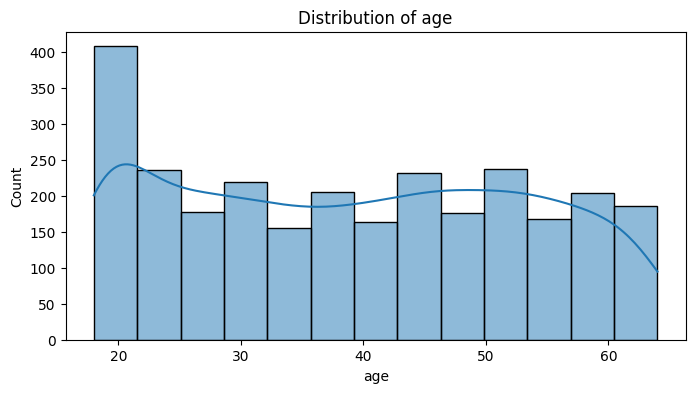

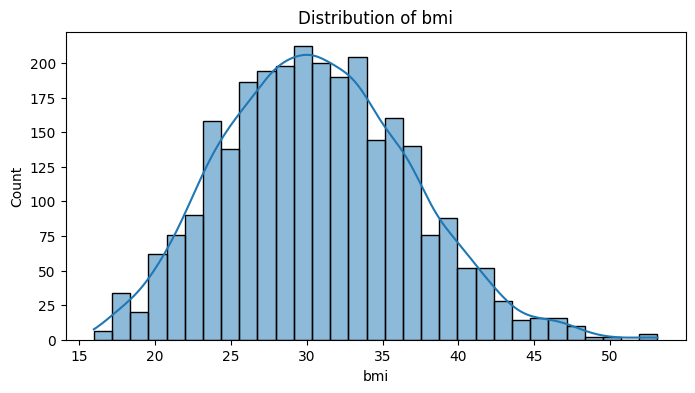

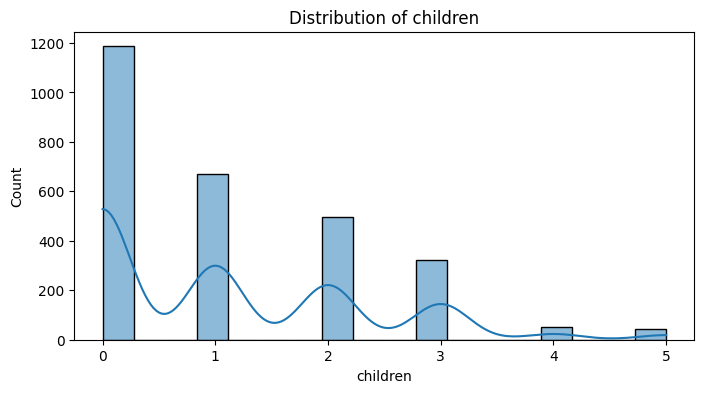

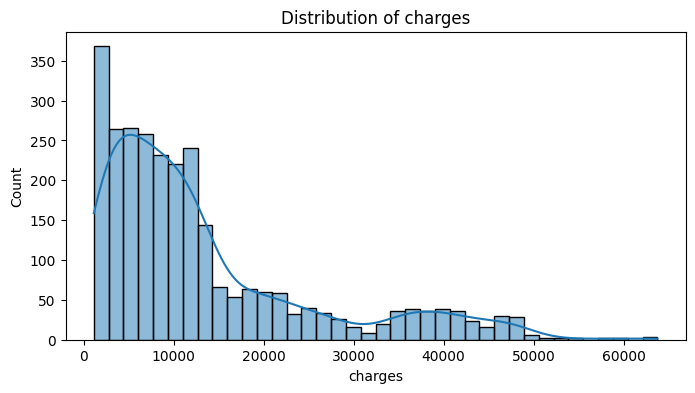

Value counts for sex:
sex
male      1406
female    1366
Name: count, dtype: int64


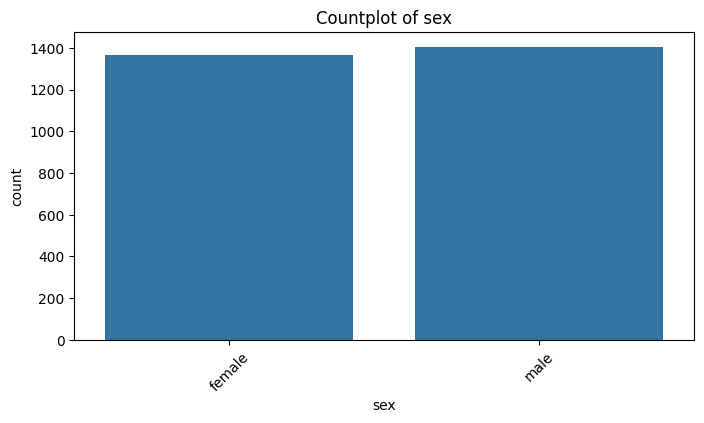

Value counts for smoker:
smoker
no     2208
yes     564
Name: count, dtype: int64


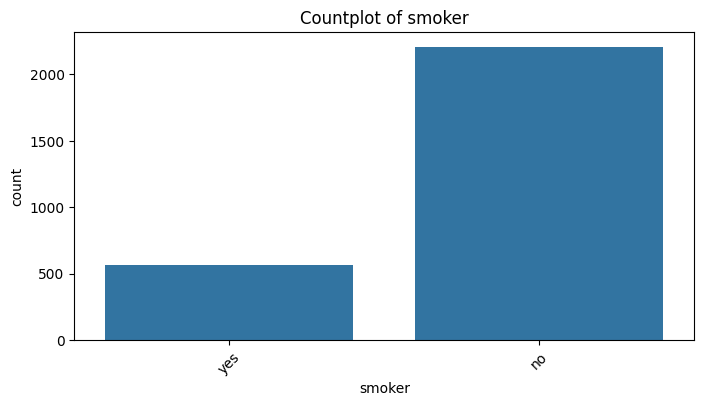

Value counts for region:
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64


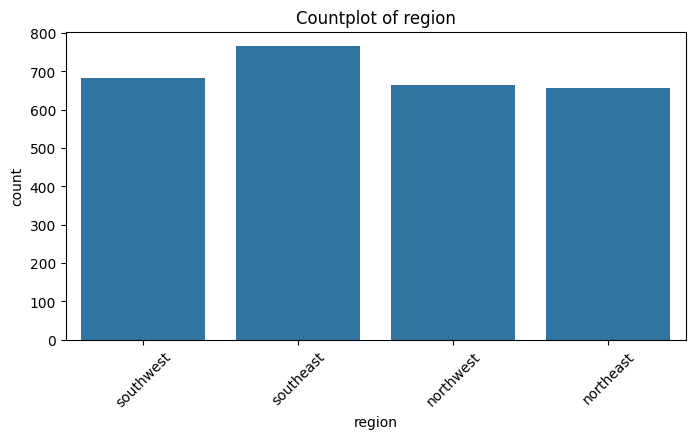

In [7]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

for col in df.select_dtypes(include='object').columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

From the the above figures we understand that :
1. Age - Ranges from 18 to 64 years.
2. Sex - Balanced distribution between males and females with failry more number of males.
3. BMI - Shows an alomost normal distribution, with some potential outliers in higher BMI values.
4. Children - Ranges from 0 to 4 mostly.
5. Smoker - Majority are non-smokers.
6. Region - Fairly even distribution across four regions, with fairly more number of data points from southeast region.
7. Charges - Distribution is highly skewed to the right.

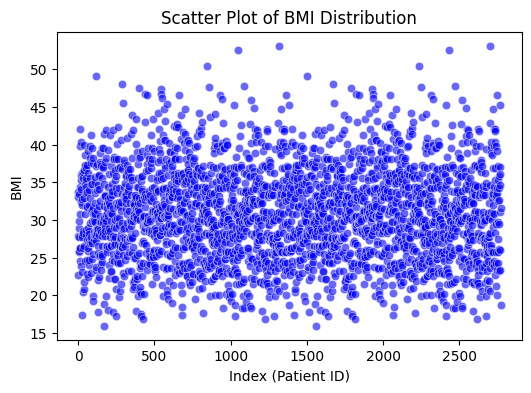

In [8]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.index, y=df["bmi"], alpha=0.6, color="blue")

plt.title("Scatter Plot of BMI Distribution")
plt.xlabel("Index (Patient ID)")
plt.ylabel("BMI")
plt.show()

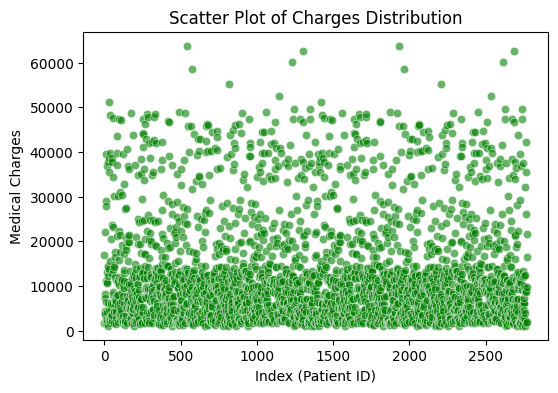

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df.index, y=df["charges"], alpha=0.6, color="green")

plt.title("Scatter Plot of Charges Distribution")
plt.xlabel("Index (Patient ID)")
plt.ylabel("Medical Charges")
plt.show()

# **Detect and Handle Outliers**

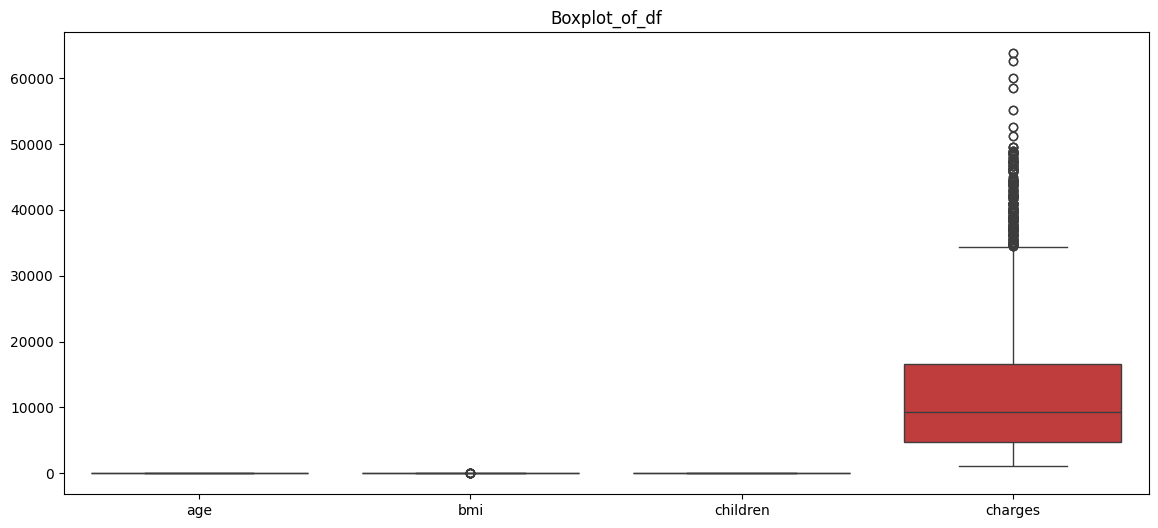

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.title("Boxplot_of_df")
plt.show() 

In [11]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[ (df['bmi'] > upper_bound)]
df['bmi'] = np.where(df['bmi'] > upper_bound, upper_bound, df['bmi'])


In [12]:
mean_charges = df["charges"].mean()
std_charges = df["charges"].std()

df["charges_zscore"] = (df["charges"] - mean_charges) / std_charges

df[df["charges_zscore"] > 3].sort_values('age')
df['charges'] = np.log1p(df['charges'])

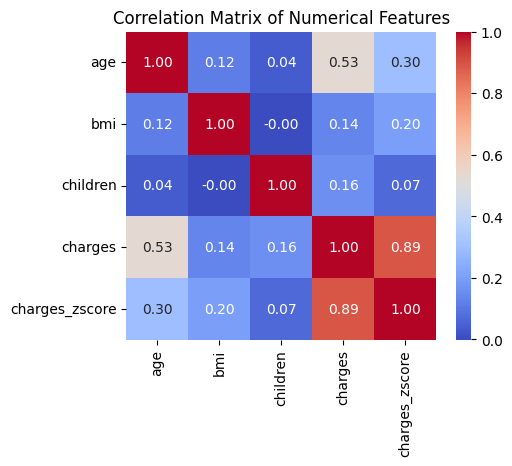

In [13]:
plt.figure(figsize=(5, 4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

From the above figure for correlation we understand that :
1. There is a slight positive correlation between **age** and **charges**.
2. There is even slighter positive correlation between **BMI** and **charges**.


## Age vs Charges

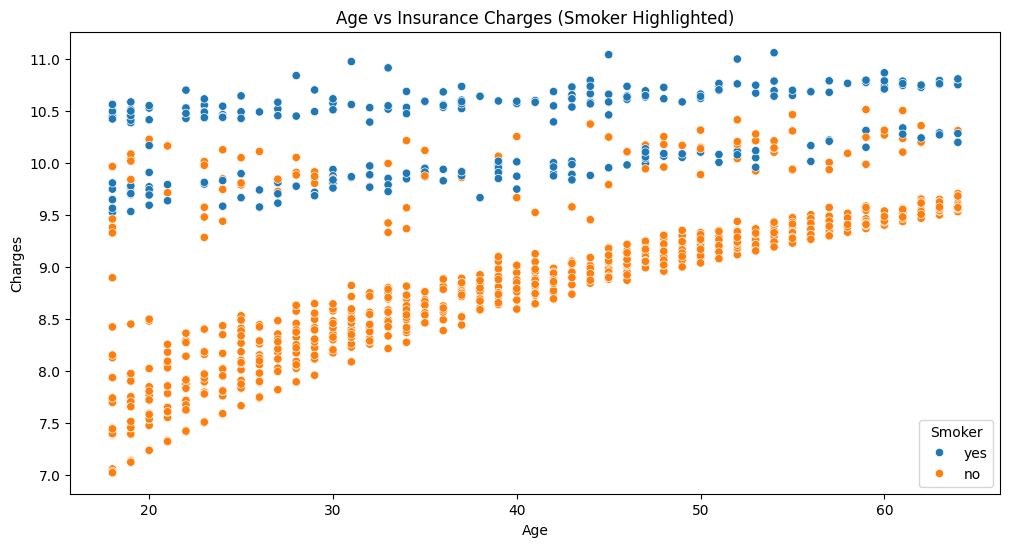

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Age vs Insurance Charges (Smoker Highlighted)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

Insights - Older people, especially smokers, pay higher charges

## BMI vs Charges

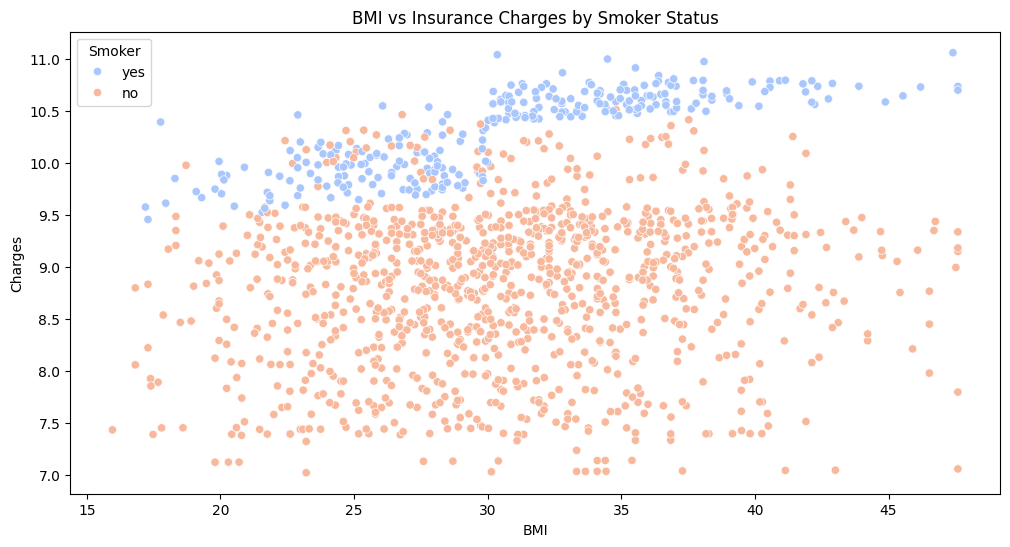

In [15]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='coolwarm')
plt.title('BMI vs Insurance Charges by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

Insights - Obese individuals tend to have higher premiums

# Average Charges by Region

C:\Users\197as\AppData\Local\Temp\ipykernel_7668\4015652405.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, estimator=np.mean, palette='viridis')


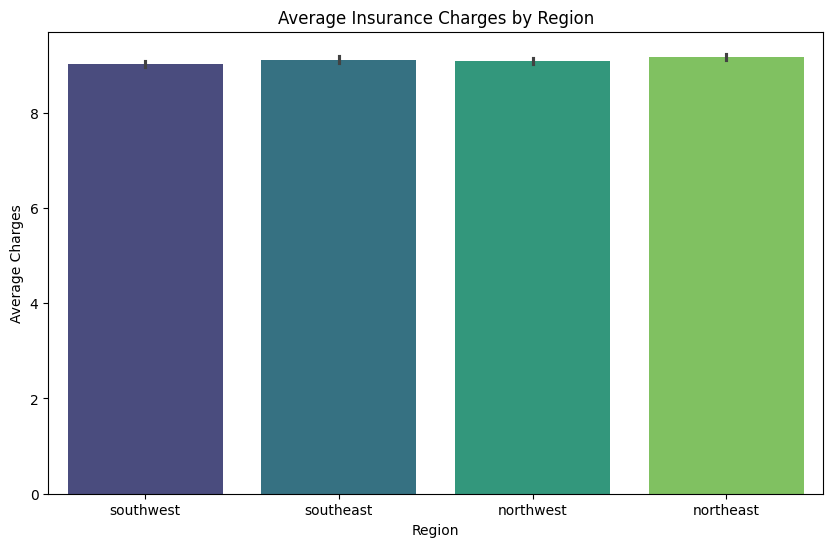

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df, estimator=np.mean, palette='viridis')
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

Compare regional pricing differences

#  Average Charges by Sex

C:\Users\197as\AppData\Local\Temp\ipykernel_7668\1754284860.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='charges', data=df, estimator=np.mean, palette='Set2')


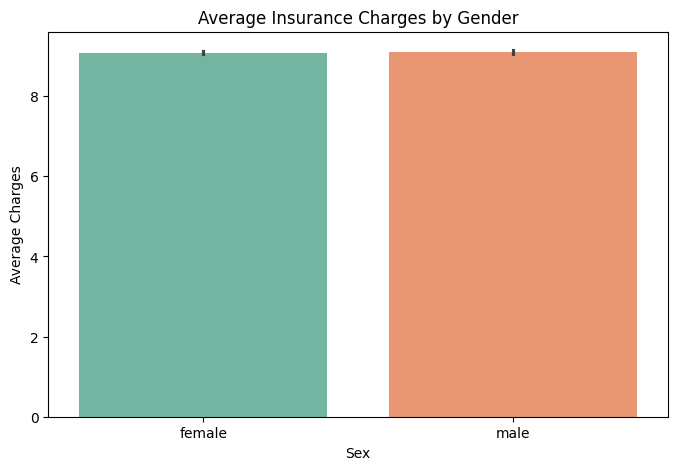

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='charges', data=df, estimator=np.mean, palette='Set2')
plt.title('Average Insurance Charges by Gender')
plt.xlabel('Sex')
plt.ylabel('Average Charges')
plt.show()

Check for gender bias or variation

# Average Charges by Number of Children

C:\Users\197as\AppData\Local\Temp\ipykernel_7668\3395491221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='charges', data=df, estimator=np.mean, palette='plasma')


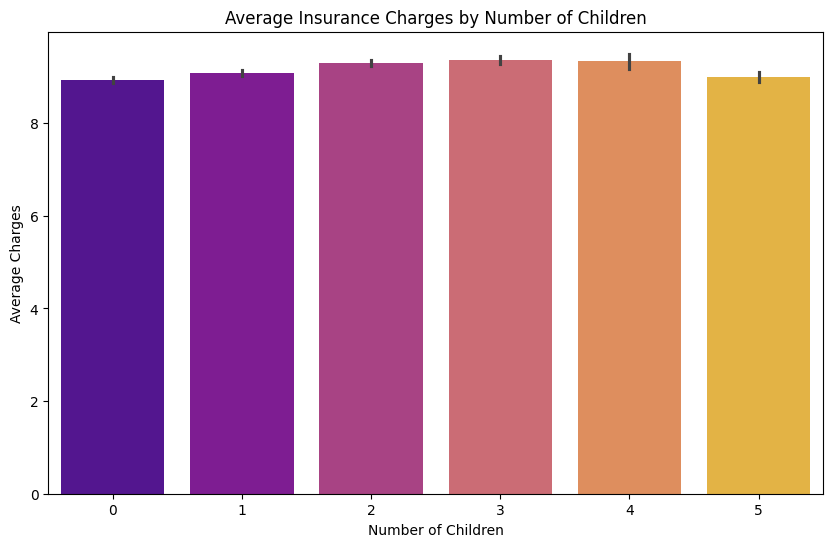

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=df, estimator=np.mean, palette='plasma')
plt.title('Average Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.show()

More children can slightly increase charges

# **Model - Linear Regression**

In [19]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [20]:
X = df.drop(["charges",'charges_zscore'], axis=1) 
y = df["charges"] 


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
X_train.shape

(2217, 8)

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

MAE: 0.30594238850624794
MSE: 0.23577427651445437
R-squared: 0.7490666079581191


# **Prediction**

In [27]:
def predict_medical_cost(age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest):
    patient = pd.DataFrame({
        "age": [age],
        "bmi": [bmi],
        "children": [children],
        "sex_male": [sex_male],
        "smoker_yes": [smoker_yes],
        "region_northwest": [region_northwest],
        "region_southeast": [region_southeast],
        "region_southwest": [region_southwest]
    })
    pred = model.predict(patient)
    return np.exp(pred[0])

age = int(input("Enter age: "))
bmi = float(input("Enter BMI: "))
children = int(input("Enter number of children: "))
sex_male = int(input("Enter 1 for male, 0 for female: "))
smoker_yes = int(input("Enter 1 if smoker, 0 if not: "))
region_northwest = int(input("Enter 1 if region is northwest, 0 otherwise: "))
region_southeast = int(input("Enter 1 if region is southeast, 0 otherwise: "))
region_southwest = int(input("Enter 1 if region is southwest, 0 otherwise: "))

cost = predict_medical_cost(age, bmi, children, sex_male, smoker_yes, region_northwest, region_southeast, region_southwest)
print("Predicted Medical Cost for user input:", round(cost, 2))

Predicted Medical Cost for user input: 5126.54


In [ ]:
import joblib as jb

In [ ]:
jb.dump(model,"Medical-Insurance-cost.jb")

['Medical-Insurance-cost.jb']